<a href="https://colab.research.google.com/github/Neha202801/CreditCardFraudDetection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fraud Transaction Detection**

###**Introduction :**
* Credit card fraud refers to the illegal use of someone else's credit card information for unauthorized financial gain. It encompasses various illicit activities, including unauthorized purchases, identity theft, card cloning, and account takeovers. Fraudsters often exploit stolen or compromised credit card details to make fraudulent transactions, resulting in financial losses for cardholders, businesses, and financial institutions. Detecting and preventing credit card fraud is crucial to safeguarding the security and trust of electronic payment systems in the digital age.





### **Project Overview :**
* The credit card fraud transaction project aims to develop a robust fraud detection system using machine learning and data analysis. The system's primary goal is to accurately identify and prevent fraudulent credit card transactions in real-time, reducing financial losses for cardholders and financial institutions. Efficiency and adaptability are central to its design, ensuring minimal impact on transaction processing while keeping pace with evolving fraud tactics. The project's success will enhance financial security and customer trust.






### **Objective :**
*     The objective of a credit card fraud detection project is to develop and deploy a machine learning based system that can **accurately and efficiently** identify fraudulent transactions from legitimate ones in real-time. This system aims to enhance security for credit cardholders and financial institutions by minimizing false positives and negatives, ultimately reducing financial losses and maintaining customer trust.







## 1. Import Liabraries and Dataset



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2).zip


In [3]:
df=pd.read_csv("/content/archive (2).zip")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Data Undestanding

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* **There are no missing values presend in the dataset.**

## Exploratory Data Analysis ( EDA )

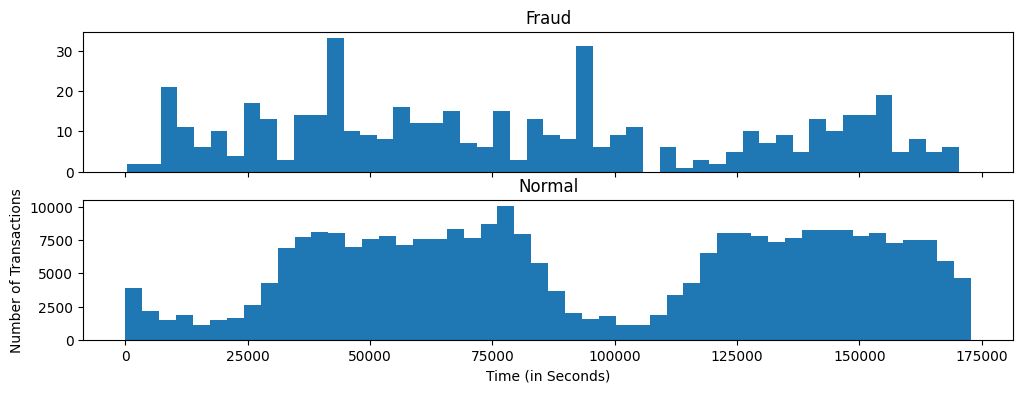

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(df.Time[df.Class == 1], bins = 50)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

* **The 'Time' feature looks pretty similar across both types of transactions. Fraudulent transactions are seems to be more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.**

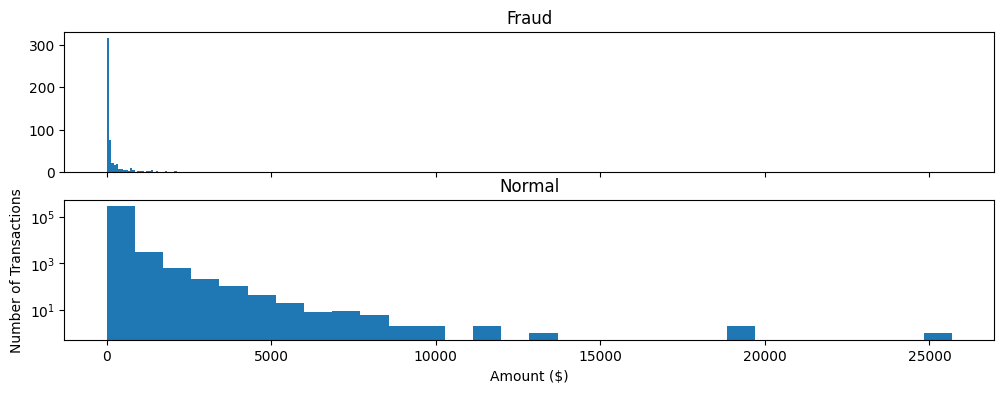

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 30
ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

* **The graph indicates that most of the transactins(both fraud and normal) are of less amount.**

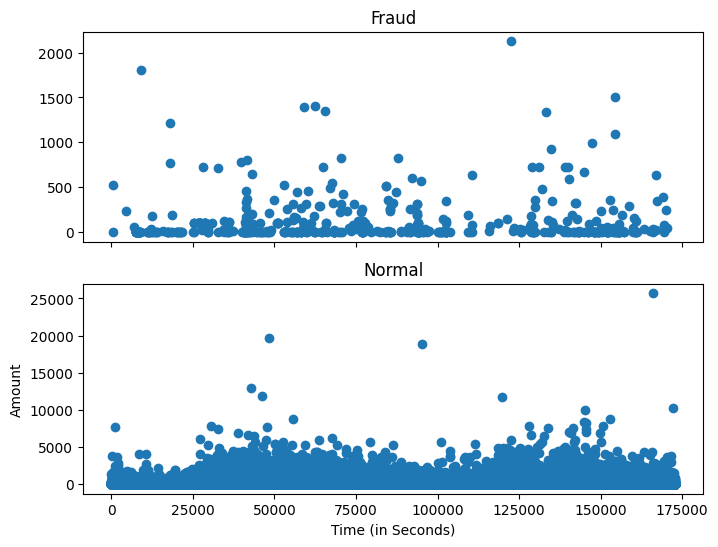

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,6))
ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')
ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [10]:
df_corr=df.corr()

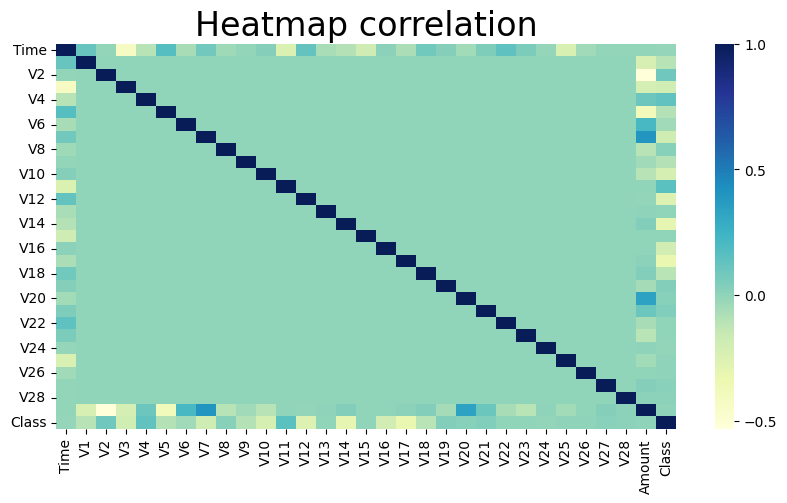

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df_corr, cmap="YlGnBu")
sns.set(font_scale=2,style='white')
plt.title('Heatmap correlation')
plt.show()

As we can notice, most of the features are not correlated with each other. This corroborates the fact that a PCA was previously performed on the data.

What can generally be done on a massive dataset is a dimension reduction. By picking the most important dimensions, there is a possiblity of explaining most of the problem, thus gaining a considerable amount of time while preventing the accuracy to drop too much.

However in this case given the fact that a PCA was previously performed, if the dimension reduction is effective then the PCA wasn't computed in the most effective way. Another way to put it is that no dimension reduction should be computed on a dataset on which a PCA was computed correctly.

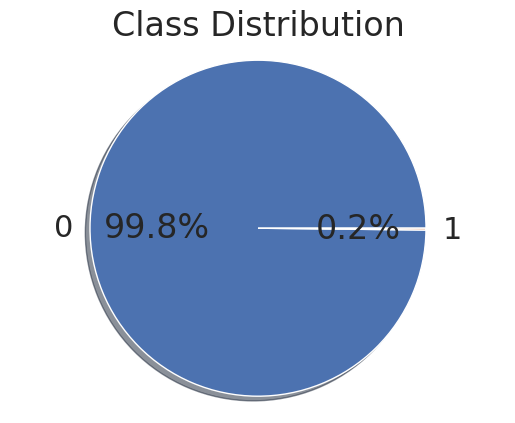

In [12]:
from pandas.core.base import value_counts
plt.pie(df['Class'].value_counts().values,autopct='%1.1f%%',labels=df['Class'].value_counts().index,shadow=True)
plt.axis('equal')
plt.title('Class Distribution')
plt.show()

**From the distribution of Class variable we can see that the data is imbalaced**

### What is Imbalanced Data ?
*   Imbalanced data means that the majority of credit card transactions are non-fraudulent (normal), while only a tiny fraction represents fraudulent activities. This severe class imbalance can make it difficult for machine learning models to effectively identify and classify the rare instances of fraud, as they tend to be overwhelmed by the abundance of non-fraudulent transactions.

In [13]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only ', number_fraud , ' frauds in the original dataset, even though there are ' ,number_no_fraud ,' no frauds in the dataset.')

There are only  492  frauds in the original dataset, even though there are  284315  no frauds in the dataset.


This dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier. To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud

In [14]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [15]:
X = df.drop('Class', axis=1)
y = df['Class']

In [16]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
X, y = pipeline.fit_resample(X,y)
Counter(y)

Counter({0: 4920, 1: 2460})

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 2)
print(f'the shape of X_train is : {X_train.shape}')
print(f'the shape of X_test is : {X_test.shape}')
print(f'the shape of y_train is : {Y_train.shape}')
print(f'the shape of y_test is : {Y_test.shape}')

the shape of X_train is : (5904, 30)
the shape of X_test is : (1476, 30)
the shape of y_train is : (5904,)
the shape of y_test is : (1476,)


## Feature Scaling

In [18]:
#Standardize feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,['Amount','Time'])
X_test = scaler.transform(X_test,['Amount','Time'])

# Models

###1. Support Vector Machine

In [20]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, Y_train)
y_pred = svc_classifier.predict(X_test)
accuracy_svc = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy_svc)


Accuracy: 0.9735772357723578


###2. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(solver='liblinear')  # You can choose different solvers based on your problem

# Train the model on the training data
logistic_classifier.fit(X_train, Y_train)
# Make predictions on the test data
y_pred = logistic_classifier.predict(X_test)

# Evaluate the model
accuracy_LR = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy_LR)

Accuracy: 0.9749322493224932


### 3. K Nearest Neighbour

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
y_pred = knn_classifier.predict(X_test)
accuracy_KNN= accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy_KNN)


Accuracy: 0.9796747967479674


### 4. Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,Y_train)
y_pred= rf_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(Y_test,y_pred)
conf_matrix_rf= confusion_matrix(Y_test, y_pred)
report_rf= classification_report(Y_test, y_pred)
print("Accuracy:", accuracy_rf)

Accuracy: 0.9830623306233063



**The Random Forest model emerged as the most promising choice for credit card fraud detection, boasting the highest accuracy(98%) among the four models tested. This  signifies that the Random Forest model is well-suited to effectively identify fraudulent transactions, enhancing security and trust in our system.**







## Confusion Matrix
**Structure:**
* **True Negatives (Upper Left Square):** The amount of correctly classified by our model of no fraud transactions.
* **False Negatives (Upper Right Square):** The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud .
* **False Positives (Lower Left Square):** The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud .
* **True Positives(Lower Right Square):** The amount of correctly classified by our model of fraud transactions.

In [23]:
print("Final Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", report_rf)

Final Accuracy: 0.9830623306233063
Confusion Matrix:
 [[973   2]
 [ 23 478]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       975
           1       1.00      0.95      0.97       501

    accuracy                           0.98      1476
   macro avg       0.99      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476



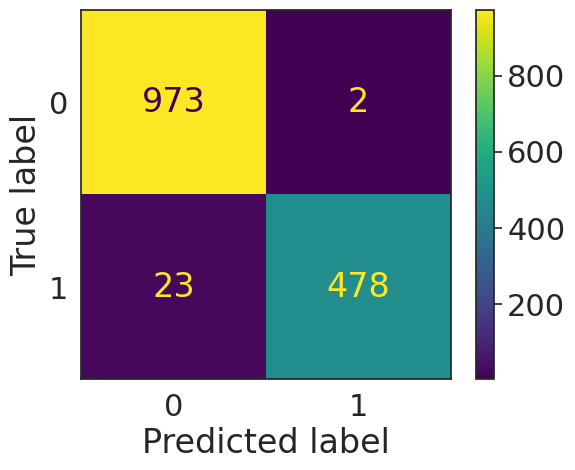

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay=ConfusionMatrixDisplay(conf_matrix_rf).plot()

##Observations:
* ###  In our analysis, we encountered a total of 975 non-fraudulent transactions, and our advanced algorithm made accurate predictions by identifying 973 of them as non-fraudulent, with just 2 cases misclassified as fraud
* ###    Moreover, among the 373 fraudulent transactions, our model demonstrated accuracy of **98%** by correctly detecting 478 of them as frauds, while maintaining precision by classifying only 23 as non-fraudulent. This highlights the impressive performance of our algorithm, resulting in a remarkable accuracy rate.".


In [25]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.9739413480730846

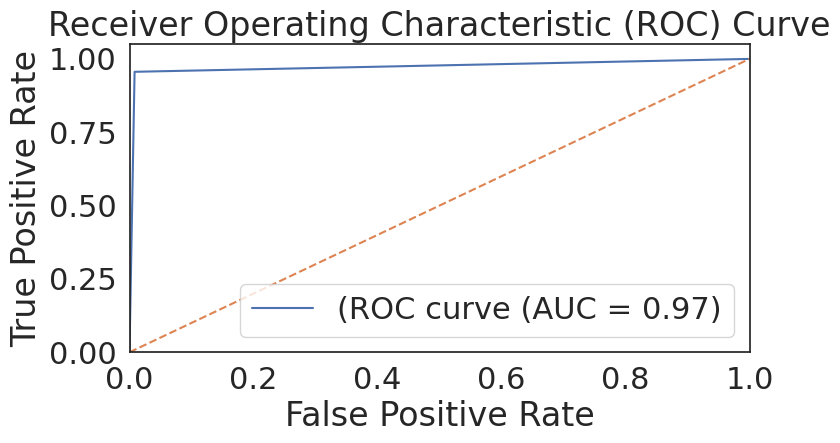

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr,label=f'(ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## **Findings**
* ### In our data analysis, we encountered a challenging class imbalance, where the majority of transactions, both legitimate and fraudulent, involved smaller amounts.
* ### Interestingly, when we delved into the 'Time' feature, a striking revelation emerged. Fraudulent transactions exhibited a remarkably uniform distribution, indicating that fraudsters operate continuously, seemingly blending into the transaction flow.
* ### In contrast, normal transactions displayed a distinctive cyclical pattern, with discernible peaks and troughs. This unique temporal signature presents a valuable opportunity for identifying fraudulent activity during 'off-peak' times when the cyclical nature of normal transactions allows anomalies to stand out

##**Conclusion:**
###1) I initiated the analysis with the Support Vector Classifier (SVC), where I achieved an impressive accuracy of 97%.
###2) I continued by employing the Logistic Regression model, which yielded an even higher accuracy of 97.5%.
###3) Subsequently, I explored the K-Nearest Neighbors classifier, achieving a remarkable accuracy rate of 97.9%.
###4) Finally, I put the Random Forest Classifier algorithm to the test, and it delivered outstanding results with an **accuracy of 98%.**
* ###  These accomplishments highlight a progressively improved performance, showcasing the effectiveness of the various algorithms utilized in the analysis

##**Limitations:**
###1. **Emerging Fraud Schemes:** Fraudsters continuously adapt and develop new techniques, making it challenging for model to keep up with evolving fraud patterns.
###2. **Algorithm Selection:** Choosing the right algorithm or ensemble of algorithms can be challenging, as each has its strengths and weaknesses in fraud detection.
###3.**Model Maintenance:** Models require regular updates and retraining to adapt to changing fraud patterns and data distributions